In [22]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
# Load the dataset
df = pd.read_csv("Flipkart iphone Sales.csv")
df

,Product,Price,Discount,Ratings,Ratings Count,Reviews
0,"Apple iPhone 13 (Starlight, 128 GB)","44,999",9% off,4.6,"2,89,192 Ratings","13,843 Reviews"
1,"Apple iPhone 13 (Midnight, 128 GB)","44,999",9% off,4.6,"2,89,192 Ratings","13,843 Reviews"
2,"Apple iPhone 13 (Blue, 128 GB)","44,999",9% off,4.6,"2,89,192 Ratings","13,843 Reviews"
3,"Apple iPhone 15 (Pink, 128 GB)","64,400",7% off,4.6,"2,53,754 Ratings","9,213 Reviews"
4,"Apple iPhone 15 (Blue, 128 GB)","64,400",7% off,4.6,"2,53,754 Ratings","9,213 Reviews"
...,...,...,...,...,...,...
553,"Apple iPhone 6s Plus (Rose Gold, 16 GB)","49,999",30% off,4.4,"18,772 Ratings","2,356 Reviews"
554,"Apple iPhone 7 Plus (Rose Gold, 32 GB)","37,900",0% off,4.5,"29,754 Ratings","2,974 Reviews"
555,"Apple iPhone 6s Plus (Space Grey, 64 GB)","59,999",26% off,4.4,"18,772 Ratings","2,356 Reviews"
556,"Apple iPhone SE (Red, 64 GB)","39,900",0% off,4.5,"1,54,666 Ratings","11,991 Reviews"


In [39]:
# Preprocess the data
df["Price"] = df["Price"].str.replace(",", "").astype(float)
df["Discount"] = df["Discount"].str.replace("% off", "").astype(float)
df["Ratings Count"] = df["Ratings Count"].str.replace(",", "").str.extract(r'(\d+)').astype(int)
df["Reviews"] = df["Reviews"].str.replace(",", "").str.extract(r'(\d+)').astype(int)

In [ ]:
df["Label"] = df["Product"].str.extract(r"(iPhone\s\d+)")

In [41]:
# Drop the original product name
df = df.drop(columns=["Product"])

In [42]:
# Handle missing values if any
df = df.dropna()

In [43]:
df

,Price,Discount,Ratings,Ratings Count,Reviews,Label
0,44999.0,9.0,4.6,289192,13843,iPhone 13
1,44999.0,9.0,4.6,289192,13843,iPhone 13
2,44999.0,9.0,4.6,289192,13843,iPhone 13
3,64400.0,7.0,4.6,253754,9213,iPhone 15
4,64400.0,7.0,4.6,253754,9213,iPhone 15
...,...,...,...,...,...,...
552,49999.0,30.0,4.4,18772,2356,iPhone 6
553,49999.0,30.0,4.4,18772,2356,iPhone 6
554,37900.0,0.0,4.5,29754,2974,iPhone 7
555,59999.0,26.0,4.4,18772,2356,iPhone 6


Distribution of Ratings & Prices

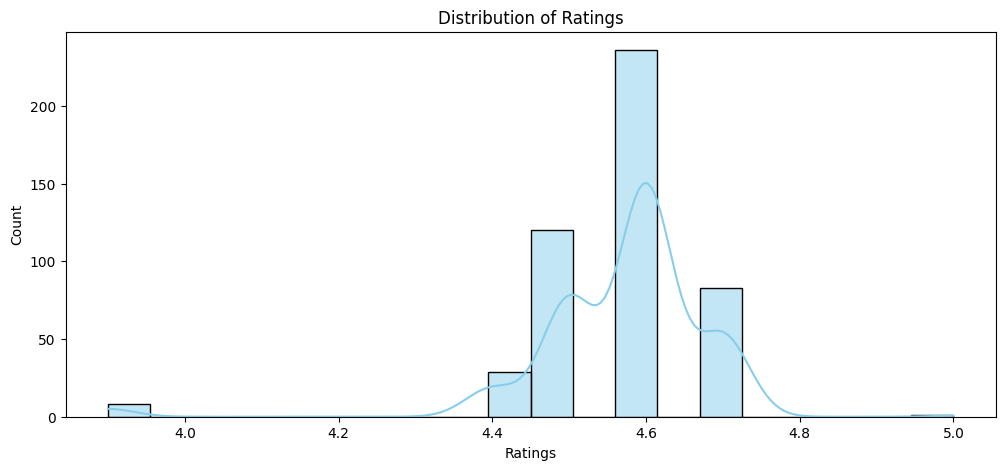

In [45]:
plt.figure(figsize=(12, 5))
sns.histplot(df["Ratings"], bins=20, kde=True, color='skyblue')
plt.title("Distribution of Ratings")
plt.show()

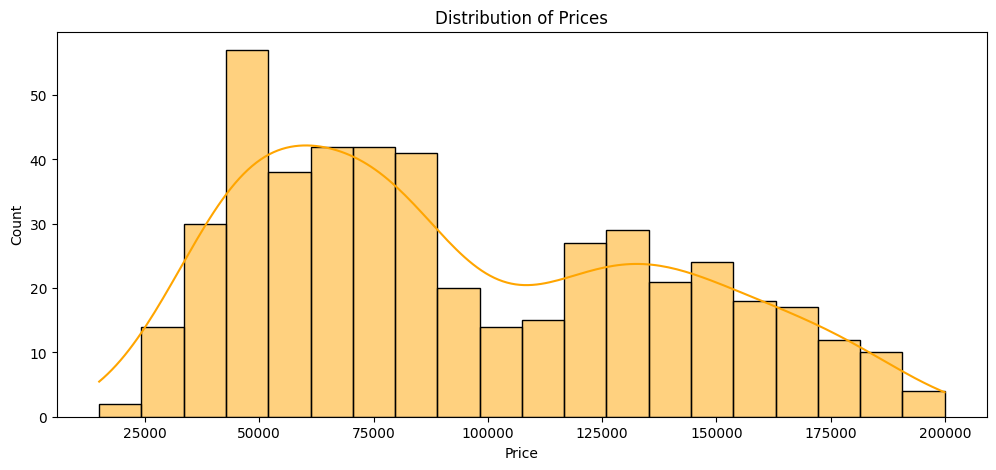

In [46]:
plt.figure(figsize=(12, 5))
sns.histplot(df["Price"], bins=20, kde=True, color='orange')
plt.title("Distribution of Prices")
plt.show()

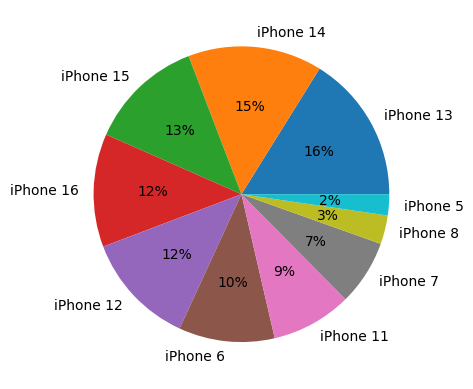

In [49]:
lb_count = df['Label'].value_counts()

plt.pie(lb_count.values, labels = lb_count.index, autopct = "%.0f%%")
plt.show()

Unsupervised Learning (Clustering)

In [10]:
features_for_clustering = df.drop(columns=["Label"])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_clustering)

# Use k=3 based on elbow method
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(scaled_features)
df

,Price,Discount,Ratings,Ratings Count,Reviews,Label,Cluster
0,44999.0,9.0,4.6,289192.0,13843.0,iPhone 13,1
1,44999.0,9.0,4.6,289192.0,13843.0,iPhone 13,1
2,44999.0,9.0,4.6,289192.0,13843.0,iPhone 13,1
3,64400.0,7.0,4.6,253754.0,9213.0,iPhone 15,1
4,64400.0,7.0,4.6,253754.0,9213.0,iPhone 15,1
...,...,...,...,...,...,...,...
552,49999.0,30.0,4.4,18772.0,2356.0,iPhone 6,2
553,49999.0,30.0,4.4,18772.0,2356.0,iPhone 6,2
554,37900.0,0.0,4.5,29754.0,2974.0,iPhone 7,0
555,59999.0,26.0,4.4,18772.0,2356.0,iPhone 6,2


In [ ]:
# Use k=3 based on elbow method
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(scaled_features)

,Price,Discount,Ratings,Ratings Count,Reviews,Label,Cluster
0,44999.0,9.0,4.6,289192,13843,iPhone 13,1
1,44999.0,9.0,4.6,289192,13843,iPhone 13,1
2,44999.0,9.0,4.6,289192,13843,iPhone 13,1
3,64400.0,7.0,4.6,253754,9213,iPhone 15,1
4,64400.0,7.0,4.6,253754,9213,iPhone 15,1
...,...,...,...,...,...,...,...
552,49999.0,30.0,4.4,18772,2356,iPhone 6,2
553,49999.0,30.0,4.4,18772,2356,iPhone 6,2
554,37900.0,0.0,4.5,29754,2974,iPhone 7,0
555,59999.0,26.0,4.4,18772,2356,iPhone 6,2


K-means Cluster Scatter Plot (Price vs Rating)

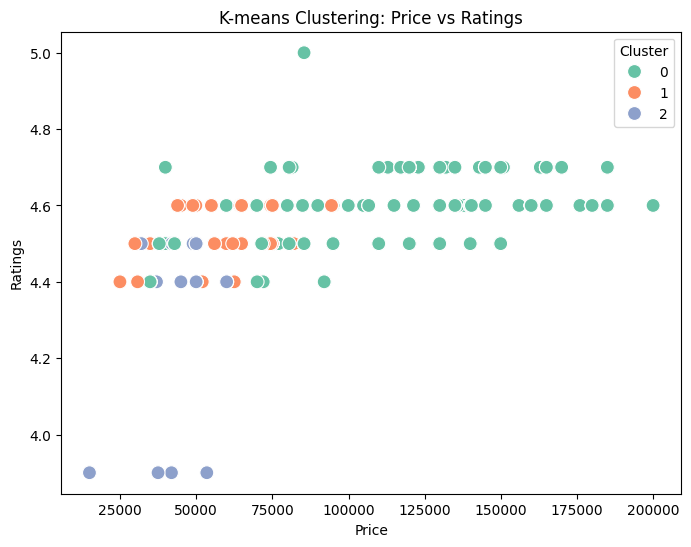

In [19]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Price", y="Ratings", hue="Cluster", palette="Set2", s=100)
plt.title("K-means Clustering: Price vs Ratings")
plt.show()

# Heatmap of Correlation

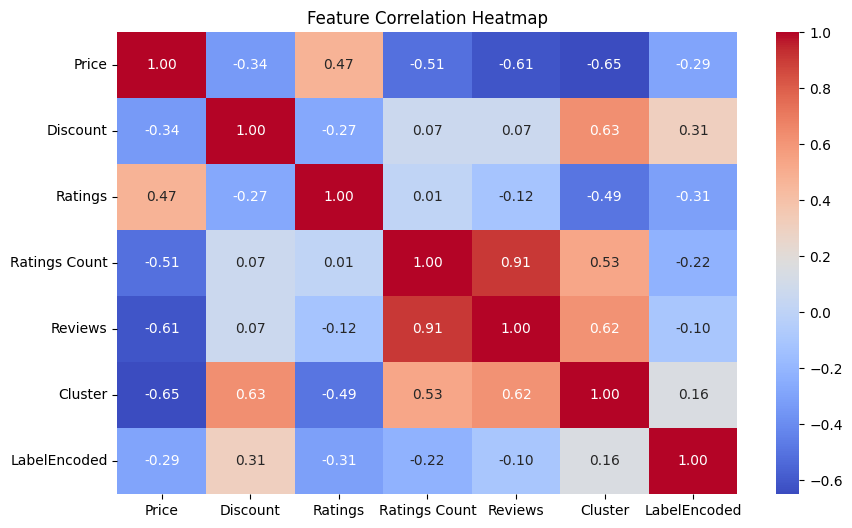

In [20]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.drop(columns=["Label"]).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

Supervised Learning (Classification)

In [12]:
# Encode the label
le = LabelEncoder()
df["LabelEncoded"] = le.fit_transform(df["Label"])

In [13]:
# Define features and target
X = df.drop(columns=["Label", "LabelEncoded"])
y = df["LabelEncoded"]

In [14]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Models to test
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}


In [16]:
# Evaluate models
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="weighted")
    results.append({"Model": name, "Accuracy": acc, "F1 Score": f1})

results_df = pd.DataFrame(results)
print("\nModel Evaluation Results:")
print(results_df)

c:\Users\saran\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\saran\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:54:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Model Evaluation Results:
                 Model  Accuracy  F1 Score
0  Logistic Regression  0.510417  0.481901
1                  SVM  0.343750  0.269997
2                  KNN  0.781250  0.790809
3        Random Forest  0.989583  0.989864
4              XGBoost  0.979167  0.979575


Model Comparison Bar Chart

<Figure size 1000x600 with 0 Axes>

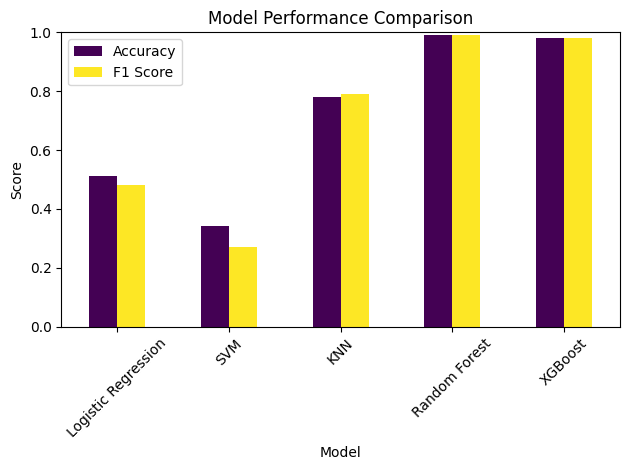

In [21]:
plt.figure(figsize=(10, 6))
results_df.set_index("Model")[["Accuracy", "F1 Score"]].plot(kind="bar", colormap="viridis", ylim=(0,1))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Hyperparameter Tuning 

In [17]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy')
grid.fit(X_train, y_train)

print("\nBest Hyperparameters (Random Forest):")
print(grid.best_params_)


Best Hyperparameters (Random Forest):
{'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}


In [18]:
# Evaluate tuned model
best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test)
print("\nTuned Random Forest Accuracy:", accuracy_score(y_test, y_pred_best))
print("Tuned Random Forest F1 Score:", f1_score(y_test, y_pred_best, average="weighted"))


Tuned Random Forest Accuracy: 0.9895833333333334
Tuned Random Forest F1 Score: 0.9898639169472503
